In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Regional Sales Dataset.xlsx'

In [ ]:
sheets = pd.read_excel(file_path, sheet_name=None)

In [ ]:
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_products=sheets['Products']
df_budgets=sheets['2024 Budgets']

In [ ]:
print(f"df_sales: {df_sales.shape}")
print(f"df_customers: {df_customers.shape}")
print(f"df_regions: {df_regions.shape}")
print(f"df_state_reg: {df_state_reg.shape}")
print(f"df_products: {df_products.shape}")
print(f"df_budgets: {df_budgets.shape}")


df_sales: (64104, 12)
df_customers: (175, 2)
df_regions: (994, 15)
df_state_reg: (49, 3)
df_products: (30, 2)
df_budgets: (30, 2)


In [ ]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
print(df_state_reg.head())

      Column1     Column2 Column3
0  State Code       State  Region
1          AL     Alabama   South
2          AR    Arkansas   South
3          AZ     Arizona    West
4          CA  California    West


In [ ]:
new_header=df_state_reg.iloc[0]
df_state_reg=df_state_reg[1:]
df_state_reg.columns=new_header

In [ ]:
print(df_state_reg.head())

0 State Code       State Region
1         AL     Alabama  South
2         AR    Arkansas  South
3         AZ     Arizona   West
4         CA  California   West
5         CO    Colorado   West


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
len(df_sales)==len(df_sales.drop_duplicates())

True

In [ ]:
df_state_reg_clean=df_state_reg[["State Code","Region"]]

In [ ]:
df = (
    df_sales
    .merge(df_customers, how='left', left_on='Customer Name Index', right_on='Customer Index')
    .merge(df_products, how='left', left_on='Product Description Index', right_on='Index')
    .merge(df_regions, how='left', left_on='Delivery Region Index', right_on='id')
    .merge(df_state_reg_clean, how='left', left_on='state_code', right_on='State Code')
    .merge(df_budgets, how='left', on='Product Name')
)

In [ ]:
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']

df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2024 budgets'], dtype=object)

In [ ]:
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2024 budgets
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2024 budgets',
]

In [ ]:
df=df[cols_to_keep]

In [ ]:
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2024 budgets'     : 'budget'
})

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2020-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2020-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2020-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df.to_csv('check.csv')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [ ]:
df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA

In [ ]:
df.to_csv('finalcheck.csv')

In [ ]:
df_2024=df[df['order_date'].dt.year==2024]

In [ ]:
df_2024.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
61626,SO - 0001442,2024-01-01,Skajo Ltd,Export,Product 13,7,5902.7,41318.9,3541.620,OR,Oregon,West,45.49428,-122.86705,3720639.645
61627,SO - 0003288,2024-01-01,Tagfeed Ltd,Wholesale,Product 25,10,1045.2,10452.0,731.640,GA,Georgia,South,33.36149,-82.07500,5342315.484
61628,SO - 0003590,2024-01-01,WOCKHARDT Group,Distributor,Product 21,6,1092.1,6552.6,436.840,MD,Maryland,South,39.08400,-77.15276,959899.218
61629,SO - 0005484,2024-01-01,Johnson Ltd,Distributor,Product 5,6,3926.2,23557.2,1845.314,CT,Connecticut,Northeast,41.39733,-72.92223,3925424.542
61630,SO - 0006720,2024-01-01,Amerisourc Corp,Distributor,Product 13,10,3959.7,39597.0,2732.193,IL,Illinois,Midwest,41.69112,-88.10157,3720639.645


In [ ]:
df_2024.to_csv('25check.csv')

In [ ]:
df.budget.value_counts()

,count
budget,
5685138.270,240
5342315.484,231
4028698.409,150
3299478.315,145
3720639.645,144
3050087.565,123
3925424.542,119
3016489.209,112
2885560.824,108


In [ ]:
# Feature Engineering

df['total_cost']=df['quantity']*df['cost']
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=(df['profit']/df['revenue'])*100
df['order_month_name']=df['order_date'].dt.month_name()
df['order_day_name']=df['order_date'].dt.day_name()
df['order_month_num']=df['order_date'].dt.month

In [ ]:
df['order_month_num'].head(-1)

,order_month_num
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
64098,2.0
64099,2.0
64100,2.0
64101,2.0


In [ ]:
df['order_day_name'].head(100)

,order_day_name
0,Wednesday
1,Wednesday
2,Wednesday
3,Wednesday
4,Wednesday
...,...
95,Friday
96,Friday
97,Friday
98,Friday


In [ ]:
df.to_csv('c.csv')

In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_day_name,order_month_num
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,Wednesday,1.0
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,Wednesday,1.0
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,Wednesday,1.0
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,Wednesday,1.0
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,Wednesday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2024-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,5685138.270,11765.736,10022.664,46.0,February,Wednesday,2.0
64100,SO - 0007706,2024-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,959899.218,3474.486,1711.314,33.0,February,Wednesday,2.0
64101,SO - 0007718,2024-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,3720639.645,29133.610,14349.390,33.0,February,Wednesday,2.0
64102,SO - 0008084,2024-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,2067108.120,20511.246,7206.654,26.0,February,Wednesday,2.0


In [ ]:
df['order_month']=df['order_date'].dt.to_period('M')

In [ ]:
monthly_sales=df.groupby('order_month')['revenue'].sum()

In [ ]:
monthly_sales.head()

,revenue
order_month,
2020-01,25020272.3
2020-02,23882719.5
2020-03,23709035.4
2020-04,24853382.0
2020-05,25662165.8


In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_day_name,order_month_num,order_month
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,Wednesday,1.0,2020-01
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,Wednesday,1.0,2020-01
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,Wednesday,1.0,2020-01
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,Wednesday,1.0,2020-01
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,Wednesday,1.0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2024-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,40.15511,-74.82877,5685138.270,11765.736,10022.664,46.0,February,Wednesday,2.0,2024-02
64100,SO - 0007706,2024-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,42.11030,-88.03424,959899.218,3474.486,1711.314,33.0,February,Wednesday,2.0,2024-02
64101,SO - 0007718,2024-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,26.24453,-80.20644,3720639.645,29133.610,14349.390,33.0,February,Wednesday,2.0,2024-02
64102,SO - 0008084,2024-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,42.91002,-78.74182,2067108.120,20511.246,7206.654,26.0,February,Wednesday,2.0,2024-02


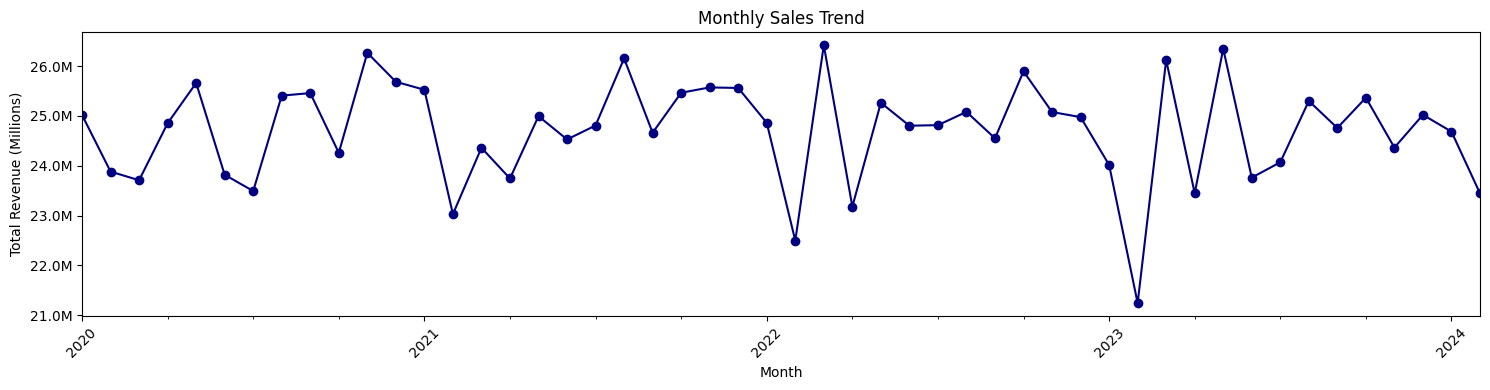

In [ ]:
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='navy')
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()


**Insights from the Monthly Sales Trend Graph:**

Sales consistently cycle between 24 M-
26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early **2023** stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

/tmp/ipython-input-42-1186821662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


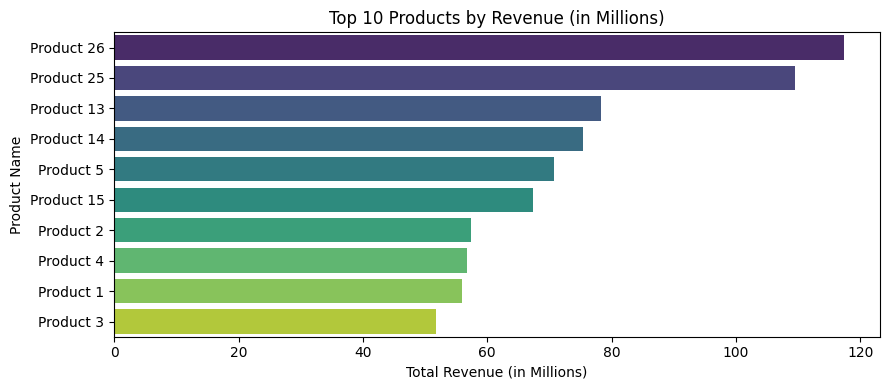

In [ ]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**INSIGHTS**

**Products 26 and 25** pull away at **118 Mand110 M**, with a sharp drop to **78M for Product13** andatightmid - **packat68-$75 M.**
The bottom four cluster at **52-57 M**, highlighting similar constraints.
Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.


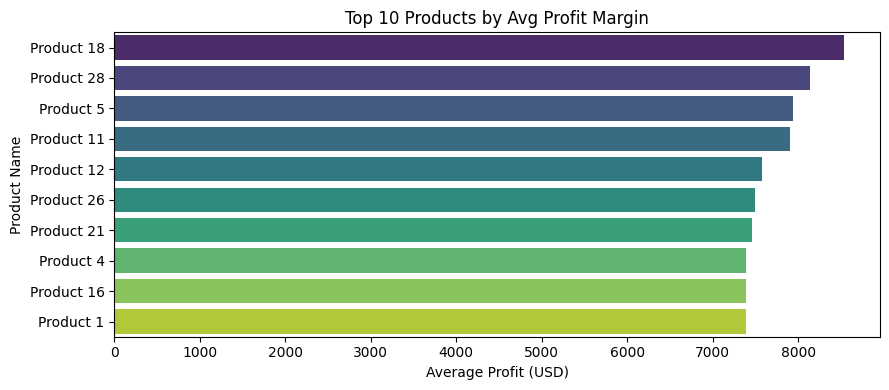

In [ ]:
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    hue=top_margin.index,
    palette='viridis',
    legend=False)
plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


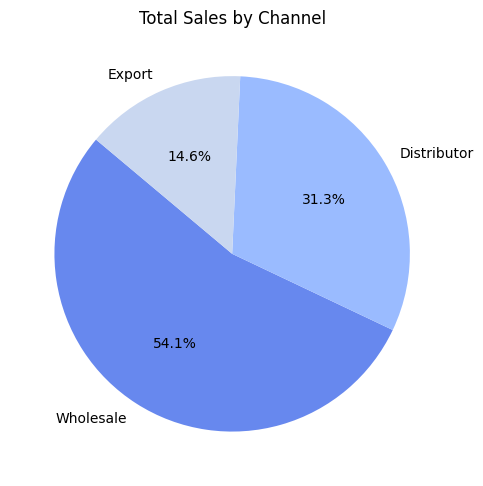

In [ ]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)
plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

**INSIGHTS**

Wholesale accounts for **54 %** of sales, with distributors at **~31%** and exports at **~15%**, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives through targeted overseas marketing and strategic partner relationships.

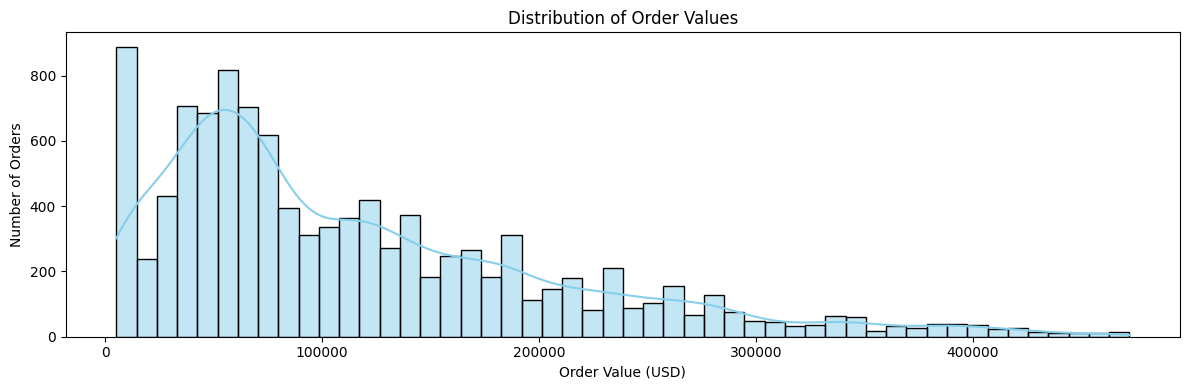

In [ ]:
aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12, 4))
sns.histplot(
    aov,
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


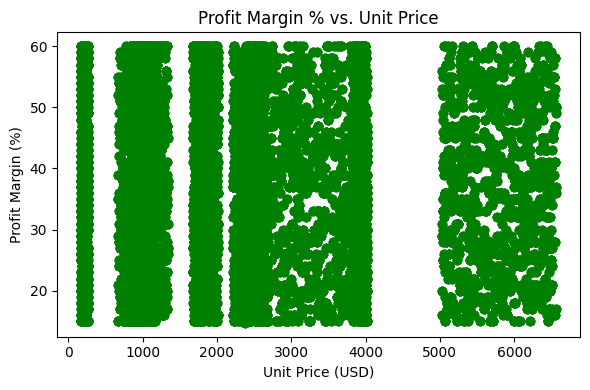

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()


plt.show()

**INSIGHTS**

Profit margins are concentrated between **~18% and 60%,** with no clear correlation to unit price, which spans from near Otoover6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

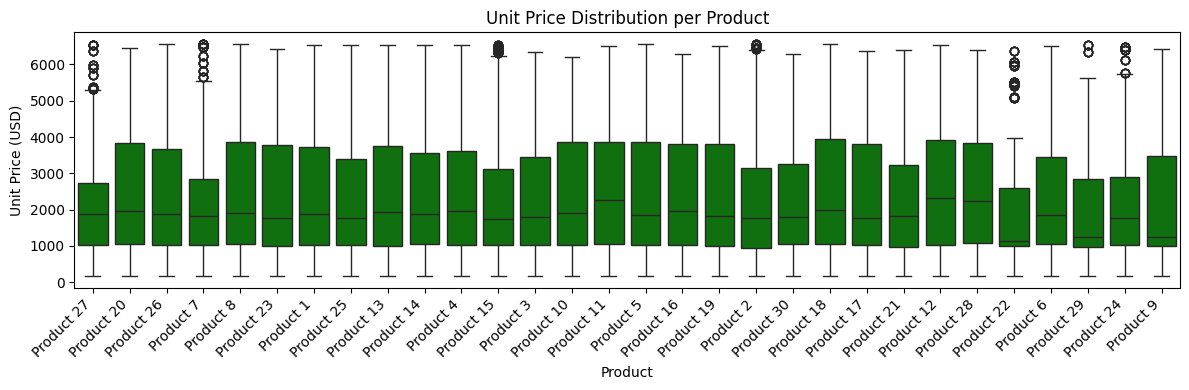

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**INSIGHTS**


Products **8, 17, 27, 20, and 28** show high-end revenue spikes-well above their upper whiskers likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 0-100) on Products **20 and 27** suggest promotional giveaways or test SKUs that pull down average prices.
To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

/tmp/ipython-input-48-1379252488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


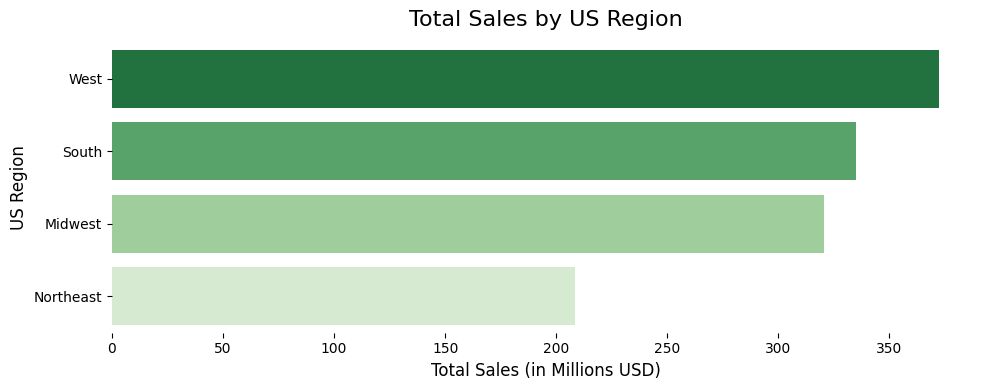

In [ ]:
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False) / 1e6
)

plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


INSIGHTS

West dominates with roughly **$360M** in sales (**~35%** of total), underscoring its market leadership.

South & Midwest each contribute over **$320M** (**~32%**), indicating strong, consistent demand across central regions.

Northeast trails at about **$210M** (**~20%**), signaling room for growth and targeted investment.

**Action:** Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.

/tmp/ipython-input-49-3954200209.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


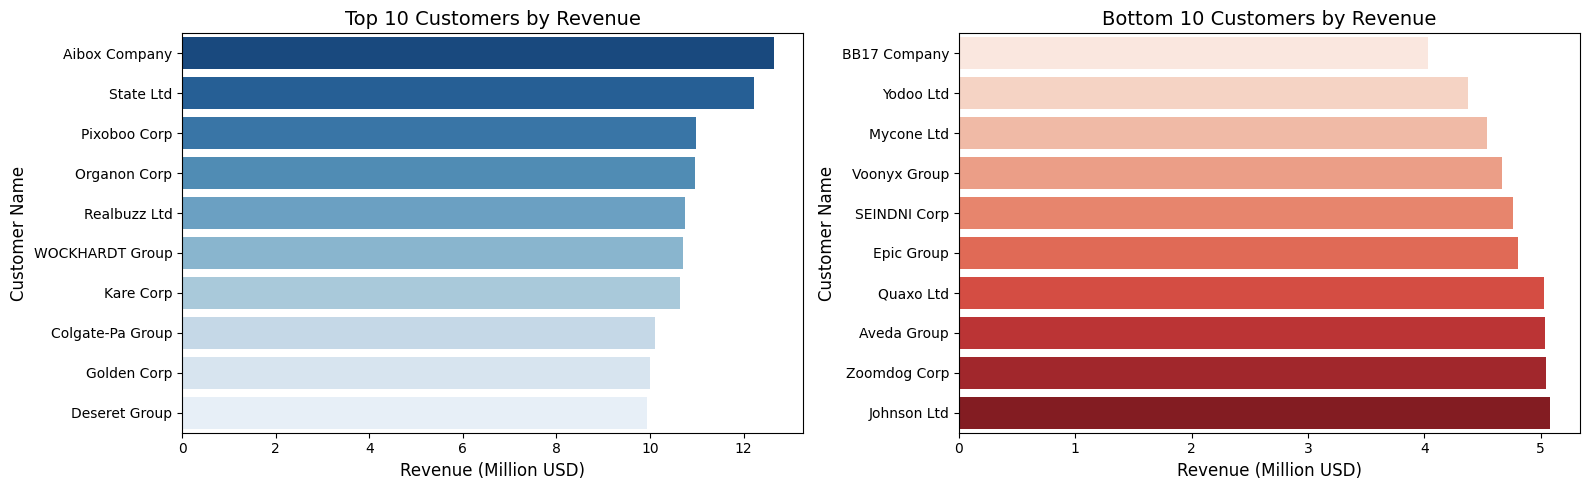

In [ ]:
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    hue=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)

plt.tight_layout()
plt.show()




INSIGHTS

Aibox Company tops the list with **12.5M,** followedcloselyby State Ltd **(12.2 M)**, while the 10th-ranked Deseret Group still contributes **9.9M **demonstratingatight
**10-12 M** top tier.

At the bottom, Johnson Ltd leads its group with **5.1M**, downto BB17Companyat **4.1M**-roughly half the top customer's revenue.

This steep drop from**~10M+to4-5 M** highlights high revenue concentration among the top customers.

**Action:** Prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort

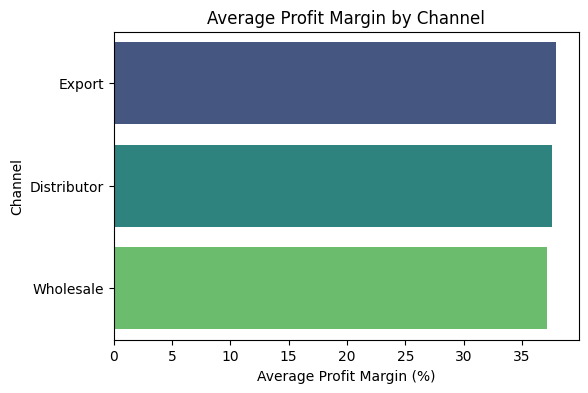

In [ ]:
channel_margin= (
     df.groupby('channel')['profit_margin_pct']
     .mean()
    .sort_values(ascending=False)

)

plt.figure(figsize=(6,4))

sns.barplot(
    x=channel_margin.values,
    y=channel_margin.index,
    hue=channel_margin.index,
    palette='viridis'


)

plt.title('Average Profit Margin by Channel')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Channel')
plt.show()




**Key Insights:**

Export is the most profitable channel
It leads with the highest average profit margin — suggesting international sales might have better pricing power, lower discounting, or more favorable cost structures.

Distributor and Wholesale are slightly behind
Both have solid margins but are a few percentage points below Export. This could imply:

More price sensitivity or discounts in domestic **B2B markets**

Higher cost-to-serve (logistics, volume handling, etc.)

Margins are healthy across all channels
Even the **"lowest"** average (Wholesale) is still strong — above **35%**. That means your core pricing strategy is working well across the board.



/tmp/ipython-input-51-853689571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


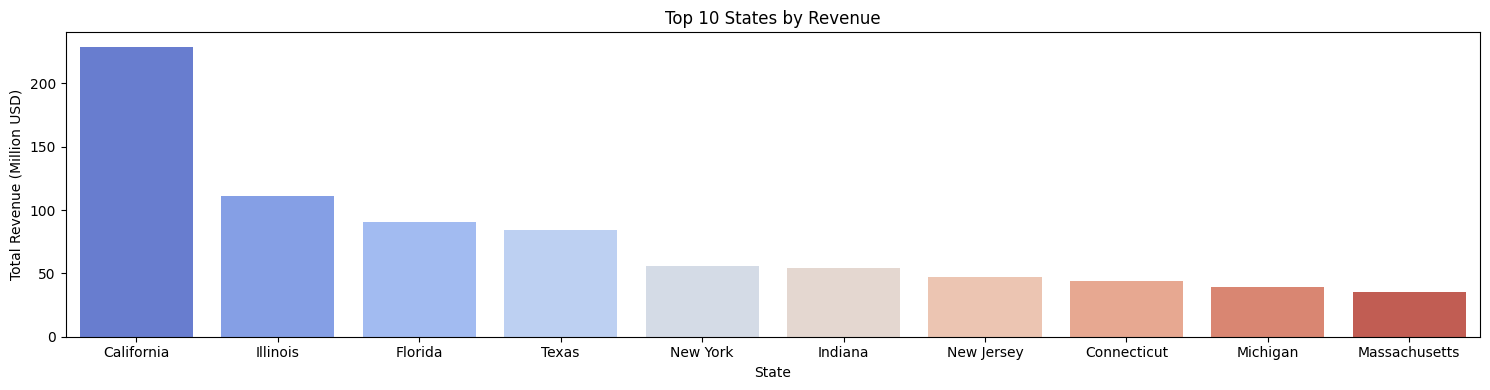

/tmp/ipython-input-51-853689571.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


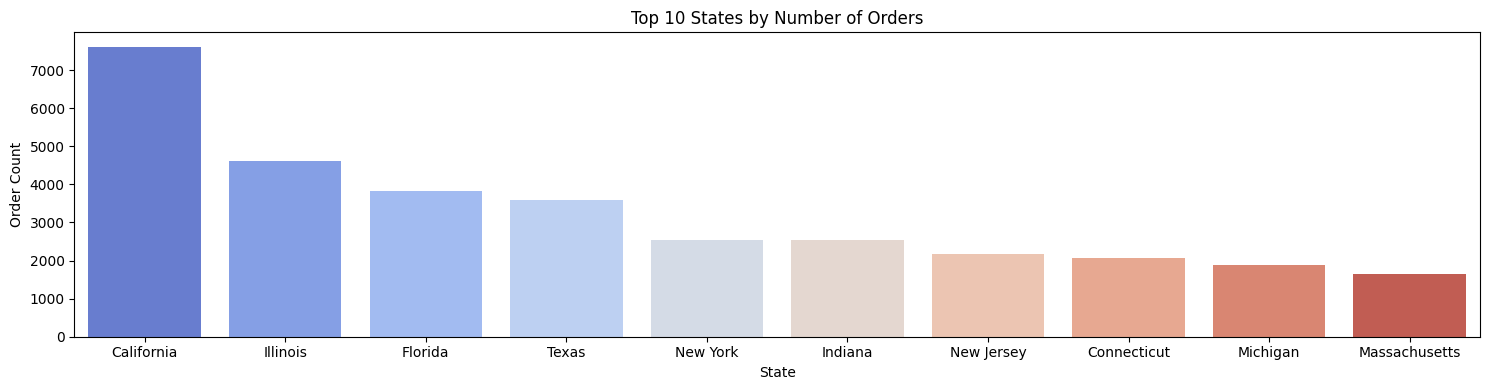

In [ ]:
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m': 'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m': ':.2f'}
)

fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()


INSIGHTS

**California leads** with 230 M, followed by **Illinois (112M)** and **Florida (90 M)**, forming a **dominanttop-tier(> 90M)**.

**Mid-tier states** (e.g., **Texas 85 M**, **NewYork55 M**) hold steady performance but trail the top three by **40-145 M.**

**Lower-tier states**(e.g., **New Jersey 47 Mdownto Massachusetts35 M**) reveal a gradual drop, indicating uneven market penetration.

**Action:** Double down on top states with tailored promotions, and launch targeted growth initiatives in under-penetrated regions to close the gap.

In [ ]:
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6
cust_summary = cust_summary.reset_index()

fig = px.scatter(
    cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    hover_name='customer_name',
    size_max=60,
    color='avg_margin',
    color_continuous_scale='Viridis',
    labels={
        'total_revenue_m': 'Total Revenue (Million USD)',
        'avg_margin': 'Avg Profit Margin (%)',
        'orders': 'Order Count'
    },
    title='Customer Segmentation: Revenue vs. Profit Margin'
)

fig.update_layout(
    xaxis=dict(title='Total Revenue (Million USD)'),
    yaxis=dict(title='Avg Profit Margin (%)'),
    margin=dict(l=20, r=20, t=60, b=40)
)

fig.show()


**INSIGHTS**

Customers with** > $10 M** in revenue tend to sustain margins between 36-40%, indicating that scale does not significantly erode profitability.

Most customers cluster within the **$6-10 M** range and show stable margins **(~34-40%)**, suggesting consistent pricing in this tier.

Customers **below $6 M** display the widest margin variance **(~33-43%)**, pointing to more volatile cost structures or discounts among smaller accounts.

Bubble size (order count) increases with revenue, but margin levels appear unaffected-reinforcing revenue as the dominant performance driver over order volume.

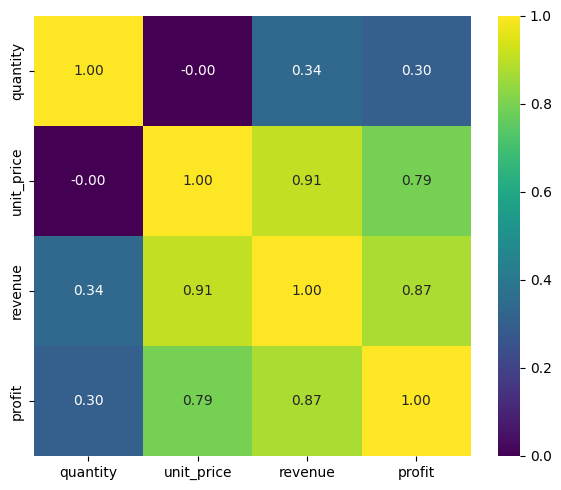

In [ ]:
num_cols=['quantity','unit_price','revenue','profit']
corr=df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)
plt.tight_layout()
plt.show()

**INSIGHTS**

Profit and revenue are very strongly correlated **(0.87)**, indicating that as sales value increases, profit tends to rise as well.

Unit price is a key driver: it correlates **0.91** with revenue,**0.79** with profit, and **0.94** with cost-highlighting how pricing decisions ripple through both top-line and expense figures.

Cost shows a strong link to revenue **(0.85)** but a more moderate tie to profit **(0.58)**, underscoring that while higher sales often bring higher expenses, margins can still vary.

Quantity has virtually no correlation with unit price or cost (**0.00**) and only modest associations with revenue **(0.34)** and profit **(0.30)**, making volume a secondary factor compared to pricing.

In [ ]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)

🔍 Key Insights

## 🔑 Key Insights

- **Monthly Revenue Cycle:**  
  Revenue stays stable between ≈\$23M–\$26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈\$21.2M) occurs in early 2017, indicating a possible one-time disruption.


- **Channel Mix:**  
  Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

- **Top Products (Revenue):**  
  Product 26: \$118M; Product 25: \$110M; Product 13: \$78M.  
  Mid-tier: \$68–75M; bottom performers: \$52–57M.

- **Profit Margins:**  
  Profit margins range broadly from ~18% to ~60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

- **Seasonal Volume:**  
  No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (~\$21.2M) may require investigation.

- **Regional Performance:**  
  California leads: ~\$230M Revenue & 7500+ orders.  
  Illinois/Florida/Texas: ~\$85M-\$110M & ~3500–4500 orders.NY/Indiana: ~\$54M & 2000+ orders.



